# Udacity Data Scientist Nanodegree 

## Orbis Roman Transport System

The Stanford Geospatial Network Model of the Roman World. A formal representation of the main road, river and sea transport routes with an intuitive Graphical User Interface.

Downloadshttps://github.com/emeeks/orbis_v2/blob/master/sites_extended.csv
https://github.com/emeeks/orbis_v2/blob/master/base_routes.geojson
https://purl.stanford.edu/mn425tz9757:, oject

medium link : https://medium.com/@yurdalege/roman-empire-road-data-2a58cb264208
github link: https://github.com/eyrdl/udacity_DSND_P1r?

## Content
* [Gather Data](#gather_data)
* [Assess Data](#assess_data)
* [Exploratory Analyses](#exploratory_analyses)
* [Explanatory Visualization](#explanatory_visualization)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id = "gather_data"></a>
## Gather Data

The data is manually downloaded from  the links mentioned above as downloads.

In [9]:
# Read the table with main survey results, one respondent per row and one column per answer
df_sites = pd.read_csv('sites_extended.csv')

In [11]:
# Read the table with survey schema, i.e., the questions that correspond to each column name
df_edges = pd.read_csv('orbis_edges_0514.csv')

In [13]:
# Read the table with survey schema, i.e., the questions that correspond to each column name
df_nodes = pd.read_csv('orbis_nodes_0514.csv')

<a id = "assess _data"></a>
## Assess Data

In [17]:
df_sites.head()

,source,target,km,days,expense,type
0,50001,50056,54.539,1.818,1.909,road
1,50001,50100,50.135,1.671,1.755,road
2,50001,50293,65.681,2.189,2.299,road
3,50001,50473,225.368,7.512,7.888,road
4,50002,50275,92.174,3.072,3.226,road


In [23]:
df_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        670 non-null    int64  
 1   label     670 non-null    object 
 2   rank      670 non-null    int64  
 3   x         670 non-null    float64
 4   y         670 non-null    float64
 5   cost      670 non-null    int64  
 6   target    670 non-null    int64  
 7   province  670 non-null    object 
 8   modern    670 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 47.2+ KB


In [25]:
df_edges.head()

,source,target,km,days,expense,type
0,50001,50056,54.539,1.818,1.909,road
1,50001,50100,50.135,1.671,1.755,road
2,50001,50293,65.681,2.189,2.299,road
3,50001,50473,225.368,7.512,7.888,road
4,50002,50275,92.174,3.072,3.226,road


In [33]:
df_edges.describe()

,source,target,km,days,expense
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,50372.724185,50372.724185,152.040558,2.421790,1.625533
std,224.346622,224.346622,170.326428,2.384729,2.253122
min,50001.000000,50001.000000,3.835000,0.085000,0.009000
25%,50183.750000,50183.750000,60.154000,0.795750,0.101000
50%,50356.000000,50356.000000,104.540000,1.652000,0.473000
75%,50552.000000,50552.000000,176.481750,3.253000,2.499000
max,50801.000000,50801.000000,2303.240000,25.388000,13.268000


In [37]:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      678 non-null    int64  
 1   label   678 non-null    object 
 2   x       623 non-null    float64
 3   y       623 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.3+ KB


In [29]:
df_nodes.head()

,id,label,x,y
0,50002,Ad fl. Tigrim,37.325,42.196
1,50209,Iulia Concordia,45.757,12.844
2,50327,Roma,41.892,12.486
3,50319,Praetorium,31.500,15.500
4,50294,Patavium,45.410,11.877


In [35]:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      678 non-null    int64  
 1   label   678 non-null    object 
 2   x       623 non-null    float64
 3   y       623 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.3+ KB


In [31]:
df_nodes.describe()

,id,x,y
count,678.000000,623.000000,623.000000
mean,50364.138643,36.656058,16.716119
std,227.472215,12.425246,13.593153
min,50001.000000,0.000000,-9.136000
25%,50173.250000,34.855000,5.386000
50%,50342.500000,39.800000,14.781000
75%,50538.750000,44.012500,28.430000
max,50801.000000,54.978000,42.219000


### Summary:

* Dataset has 670 entries, 9 columns. the columns are non - null.
* hence no need for data cleaning.
* ın the codes above i tried to understand the data. With the describe and info functions i was able to see that there are no missing values in the code.

<a id = "exploratory_analyses"></a>
## Exploratory Analyses

while investigating data i was tring to find out the distribution of road according to ;
1.province - representing the area in roman empire
2. modern - representing the location in modern era.
3. label  - details of the area in roman era.

first step is to understand the privince distribution since there sre a lot of them, as i pinpoint the top provinces i continued the same argument on modern and labels.

so that we can understand the hub centers, which is without any suprise italy, greece and egypt.

buainess questions:
1. what  are the top 3 provinces with the most number of roads?
2. what  are the number of roads within these provinces by modern era?
3. what are the the nubmer of roads by labels?
4. what are the distributions of roads by province and modern?

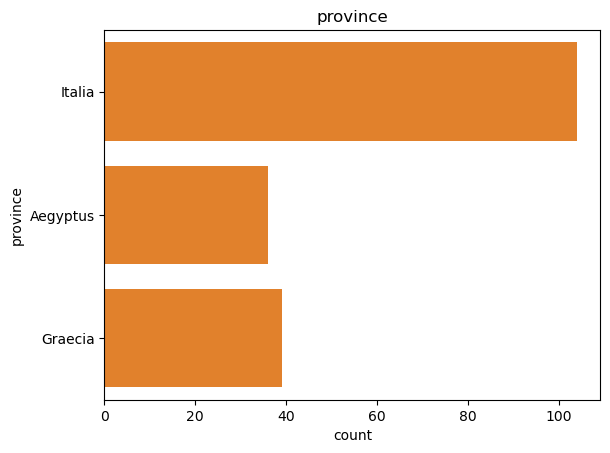

In [227]:
plt.title("province")
sns.countplot(data = df_sites, y = 'province', 
              #order = df_sites['cost'].value_counts(),
             color = sns.color_palette()[1]);

majority of the roads are availiable in Italy and Greece, Eygpt.

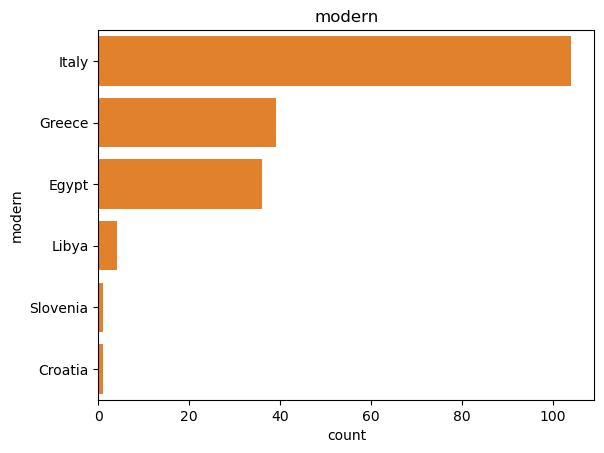

In [146]:
df_sites.province
plt.title("modern")
sns.countplot(data = df_sites, y = 'modern', order = df_sites['modern'].value_counts().nlargest(10).index,
             color = sns.color_palette()[1]);

There are way to many provs. in the survey. Gladly we will only focus on top 3 (Italy,Egypt and Grecce.

In [164]:
df_sites= df_sites[df_sites['modern'].isin(["Italy","Greece","Egypt"])]

<a id = "explanatory_visualization"></a>
## Explanatory Visualization

In [150]:
df_sites

,id,label,rank,x,y,cost,target,province,modern
3,50004,Ad Tricesimum,60,13.215,46.157,0,0,Italia,Italy
6,50007,Aeclanum,80,15.010,41.062,0,0,Italia,Italy
8,50009,Aequum Tuticum,70,15.074,41.257,0,0,Italia,Italy
9,50010,Aesernia,80,14.230,41.593,0,0,Italia,Italy
14,50015,Alba Fucens,80,13.411,42.079,0,0,Italia,Italy
...,...,...,...,...,...,...,...,...,...
664,50796,Skyllaion Pr.,70,23.518,37.438,0,0,Graecia,Greece
665,50797,Siphnos,70,24.667,36.983,0,0,Graecia,Greece
666,50798,Syros,70,24.920,37.430,0,0,Graecia,Greece
668,50800,Tenos,70,25.166,37.533,0,0,Graecia,Greece


In [184]:
# As we generate 3 neraly identical plots we define a function for it.
def plot_modern(df_sites, title, axis):
    ''' Plots selected WorkStart for given dataset, plot titel and axis identifier.'''
    
    Moderns = ["Italy","Greece","Eygpt"]
    sns.countplot(ax=axis,x = "province", data = df_sites, 
                 #order = df_sites['label'].value_counts().nlargest(10).index,
                  color = sns.color_palette()[1])
    plt.xlabel('province');
    plt.ylabel('Count');
    axis.title.set_text(title)
    axis.tick_params(rotation=100)

In [199]:
# As we generate 3 neraly identical plots we define a function for it.
def plot_label(df_sites, title, axis):
    ''' Plots selected WorkStart for given dataset, plot titel and axis identifier.'''
    
    Moderns = ["Italy","Greece","Eygpt"]
    sns.countplot(ax=axis,x = "label", data = df_sites, 
                 #order = df_sites['label'].value_counts().nlargest(10).index,
                  color = sns.color_palette()[1])
    plt.xlabel('label');
    plt.ylabel('Count');
    axis.title.set_text(title)
    axis.tick_params(rotation=100)

1. When do people start to work?

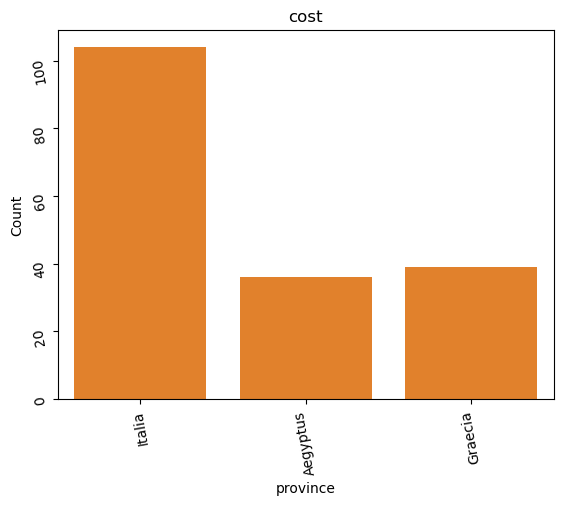

In [203]:
#work_order = ["6:00 AM", "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM", "Noon"]
#sns.countplot(x = "WorkStart", data = dfn, order = work_order, color = sns.color_palette()[1])
#plt.xlabel('WorkStart');
#plt.ylabel('Count');
#plt.title("Work Start");
#plt.xticks(rotation = 45);

fig = plt.figure()  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
plot_modern(df_sites, "cost", ax)

Italia has the most number of roads.

2. Do the people start to work earlier in USA or Germany?

In [193]:
df_i= df_sites[df_sites['modern'].isin(["Italy"])]
df_g= df_sites[df_sites['modern'].isin(["Greece"])]
df_e= df_sites[df_sites['modern'].isin(["Egypt"])]


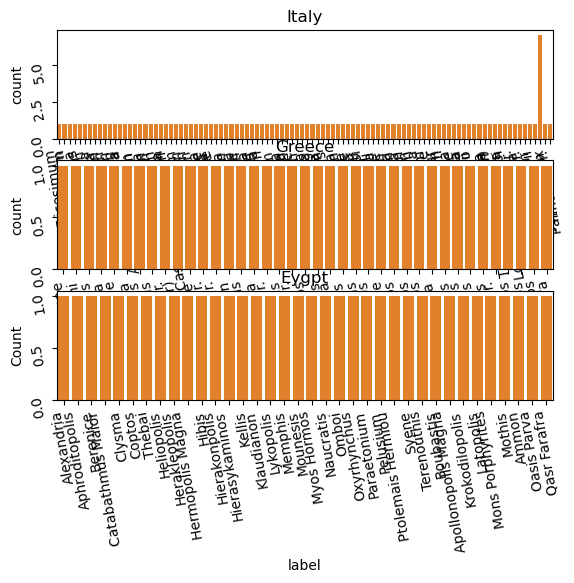

In [217]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
#fig, (ax3) = plt.subplots(1, 1)
plot_label(df_i, 'Italy', ax1)
plot_label(df_g, 'Greece', ax2)
plot_label(df_e, 'Eygpt', ax3)

most of the labels has only 1 roads except 1 label in Italy. 

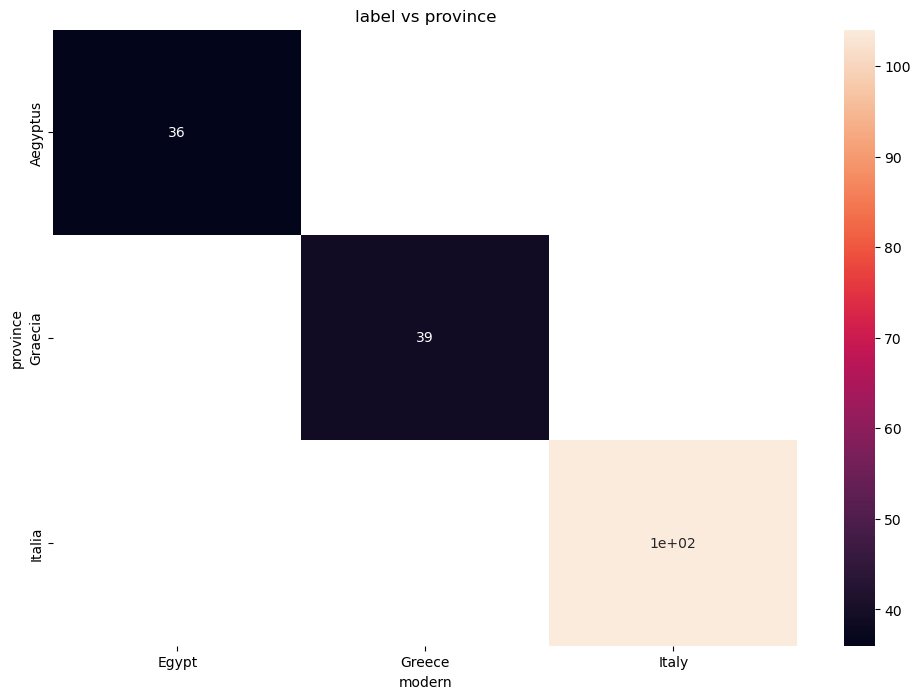

In [224]:
plt.figure(figsize = [12, 8])
temp = df_sites.groupby(['province', 'modern']).size()
temp = temp.reset_index(name = 'count')
temp = temp.pivot(index = 'province', columns = 'modern', values = 'count')
sns.heatmap(temp, annot = True);
plt.title('modern vs province');

we can see the distribuiton of province and modern by number of roads more efficiently.